---
title: "2 - Herencia"
toc: true
---

Los tres principios fundamentales de la programación orientada a objetos son la encapsulación, el polimorfismo y la herencia.

Los siguientes tres apuntes explicarán cada uno de ellos, describiendo los conceptos subyacentes y mostrando ejemplos de su implementación en Python.
Para que un lenguaje de programación pueda considerarse un lenguaje OOP, debe cumplir estos tres requisitos fundamentales.

* Herencia: construir nuevas funcionalidades a partir de código que ya existe.
* Polimorfismo: permitir que varias clases tengan métodos con el mismo nombre.
* Encapsulamiento: ocultar los detalles internos y mantener todo en un solo lugar.


Libro de Irv Kalb

In [1]:
import math

class Rectangulo:
    def __init__(self, base, altura):
        self.base = base
        self.altura = altura

    def area(self):
        return self.base * self.altura

    def perimetro(self):
        return self.base * 2 + self.altura * 2

    def resumen(self):
        return f"Rectangulo(base={self.base}, altura={self.altura})"


class Cuadrado:
    def __init__(self, lado):
        self.lado = lado

    def area(self):
        return self.lado * self.lado

    def perimetro(self):
        return self.lado * 4

    def resumen(self):
        return f"Cuadrado(lado={self.lado})"

In [2]:
r1 = Rectangulo(3, 7)
r1.area(), r1.perimetro(), r1.resumen()

c1 = Cuadrado(3)
c1.area(), c1.perimetro(), c1.resumen()

(9, 12, 'Cuadrado(lado=3)')

### Sobreescritura de métodos

In [3]:
class Cuadrado(Rectangulo):
    def __init__(self, lado):
        self.base = lado
        self.altura = lado

c1 = Cuadrado(3)
c1.area(), c1.perimetro()

(9, 12)

In [4]:
c1.resumen()

'Rectangulo(base=3, altura=3)'

In [5]:
class Cuadrado(Rectangulo):
    def __init__(self, lado):
        self.base = lado
        self.altura = lado

    def resumen(self):
        return f"Cuadrado(lado={self.base})"

c1 = Cuadrado(3)
c1.resumen()

'Cuadrado(lado=3)'

In [6]:
c1.area

<bound method Rectangulo.area of <__main__.Cuadrado object at 0x7f51f0537410>>

In [7]:
c1.perimetro

<bound method Rectangulo.perimetro of <__main__.Cuadrado object at 0x7f51f0537410>>

In [8]:
class Circulo:
    def __init__(self, radio):
        self.radio = radio

    def area(self):
        return self.radio ** 2 * math.pi

    def perimetro(self):
        return self.radio ** 2 * math.pi

    def resumen(self):
        return f"Circulo(radio={self.radio})"

c1 = Circulo(2)
c1.area(), c1.perimetro(), c1.resumen()

(12.566370614359172, 12.566370614359172, 'Circulo(radio=2)')

In [9]:
class Forma:
    def area(self):
        print("¡Error! Método aún no implementado.")

    def perimetro(self):
        print("¡Error! Método aún no implementado.")

    def resumen(self):
        return "Forma()"

f = Forma()

In [10]:
f.area()

¡Error! Método aún no implementado.


In [11]:
f.perimetro()

¡Error! Método aún no implementado.


In [12]:
f.resumen()

'Forma()'

In [13]:
class Rectangulo(Forma):
    def __init__(self, base, altura):
        self.base = base
        self.altura = altura

    def area(self):
        return self.base * self.altura

    def perimetro(self):
        return self.base * 2 + self.altura * 2

    def resumen(self):
        return f"Rectangulo(base={self.base}, altura={self.altura})"

In [14]:
r1 = Rectangulo(5, 2)
r1.area(), r1.perimetro(), r1.resumen()

(10, 14, 'Rectangulo(base=5, altura=2)')

In [20]:
class Cuadrado(Rectangulo):
    def __init__(self, lado):
        self.base = lado
        self.altura = lado

    def resumen(self):
        return f"Cuadrado(lado={self.base})"

c1 = Cuadrado(2)

In [21]:
class Forma:
    def area(self):
        print("¡Error! Método aún no implementado.")

    def perimetro(self):
        print("¡Error! Método aún no implementado.")

    def resumen(self):
        return "Forma()"

    def dibujo(self):
        return None

class Rectangulo(Forma):
    def __init__(self, base, altura):
        self.base = base
        self.altura = altura

    def area(self):
        return self.base * self.altura

    def perimetro(self):
        return self.base * 2 + self.altura * 2

    def resumen(self):
        return f"Rectangulo(base={self.base}, altura={self.altura})"

    def dibujo(self):
        # Línea superior
        print("┌" + " ─ " * (self.base) + "┐")

        # Líneas intermedias
        for _ in range(self.altura):
            print("│" + "   " * (self.base) + "│")

        # Línea inferior
        print("└" + " ─ " * (self.base) + "┘")


class Cuadrado(Rectangulo):
    def __init__(self, lado):
        self.base = lado
        self.altura = lado

    def resumen(self):
        return f"Cuadrado(lado={self.base})"

Rectangulo(3, 3).dibujo()

┌ ─  ─  ─ ┐
│         │
│         │
│         │
└ ─  ─  ─ ┘


### Uso de `super()`

In [22]:
class ListaRuidosa(list):
    def append(self, elemento):
        print("Agregando:", elemento)
        super().append(elemento)

lista_ruidosa = ListaRuidosa()
lista_ruidosa

[]

In [23]:
lista_ruidosa.append("¿funciona?")

Agregando: ¿funciona?


In [24]:
lista_ruidosa.append("¿y esto?")

Agregando: ¿y esto?


In [25]:
lista_ruidosa

['¿funciona?', '¿y esto?']

In [26]:
l = lista_ruidosa + ["¡no lo puedo creer!"]
l

['¿funciona?', '¿y esto?', '¡no lo puedo creer!']

## Herencia múltiple

- En principio, es un concepto sencillo: una clase que hereda desde más de una _parent class_ y puede acceder a funcionalidades de ambos.
- En la práctica, hay que ser cuidadosos con los _overrides_ de los métodos.

In [27]:
import math
import random

import matplotlib.pyplot as plt


class Distribucion:
    def muestra(self):
        print("¡Error! Método aún no implementado.")

    def plot(self):
        print("¡Error! Método aún no implementado.")

    def muestras(self, n=1):
        return [self.muestra() for _ in range(n)]


class Normal(Distribucion):
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

    def pdf(self, x):
        a = 1 / (self.sigma * (2 * math.pi) ** 0.5)
        b = math.exp( - 0.5 * ((x - self.mu) ** 2 / self.sigma ** 2))
        return a * b

    def muestra(self):
        return random.normalvariate(mu=self.mu, sigma=self.sigma)

    def plot(self):
        # Construir valores de 'x'
        x_inicio = self.mu - self.sigma * 3
        x_fin = self.mu + self.sigma * 3
        x_paso = (x_fin - x_inicio) / 500
        xs = [x_inicio + x_paso * i for i in range(500)]

        # Construir valores de 'y'
        ys = [self.pdf(x) for x in xs]

        # Crear gráfico
        plt.plot(xs, ys)
        plt.xlabel("x")
        plt.ylabel("p(x)")
        plt.title(f"Normal(mu={self.mu}, sigma={self.sigma})")
        plt.show()


In [28]:
normal = Normal(mu=3, sigma=0.75)

In [29]:
normal.muestra()

1.8842333454735876

In [30]:
normal.muestras(5)

[3.1474387413070675,
 3.258905714809389,
 2.9203897343489746,
 1.7248616817739801,
 3.243540225284832]

In [31]:
normal.pdf(2)

0.21868009956799153

In [32]:
normal.pdf(2.5), normal.pdf(3), normal.pdf(3.5)

(0.425930674029803, 0.5319230405352436, 0.425930674029803)

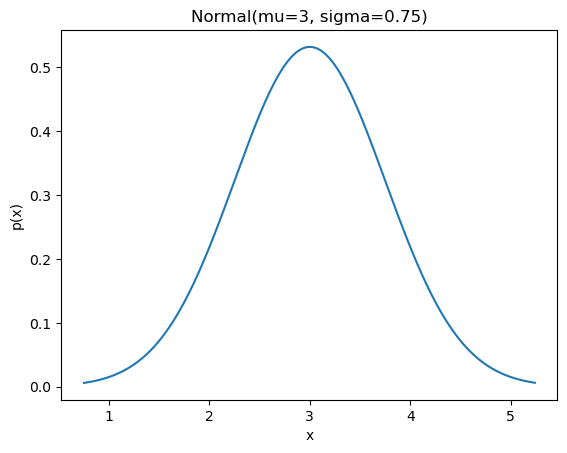

In [33]:
normal.plot()

In [34]:
class Poisson(Distribucion):
    def __init__(self, lam):
        self.lam = lam

    def pmf(self, x):
        return (math.exp(-self.lam) * self.lam ** x) / math.factorial(x)

    def muestra(self):
        S, N = 0, 0
        while S < 1:
            u = random.uniform(0, 1)
            N += 1
            S += - math.log(u) / self.lam
        return N - 1

    def plot(self):
        # Construir valores de 'x'
        xs = []
        x, cdf = 0, 0
        while cdf < 0.999:
            xs.append(x)
            cdf += self.pmf(x)
            x += 1

        # Construir valores de 'y'
        ys = [self.pmf(x) for x in xs]

        plt.vlines(xs, ymin=0, ymax=ys, lw=3)
        plt.xlabel("x")
        plt.ylabel("P(X = x)")
        plt.title(f"Poisson(lam={self.lam})")
        plt.show()

In [35]:
poisson = Poisson(3)
poisson.muestra()

5

In [36]:
poisson.muestras(5)

[5, 2, 5, 2, 3]

In [37]:
poisson.pmf(3)

0.22404180765538775

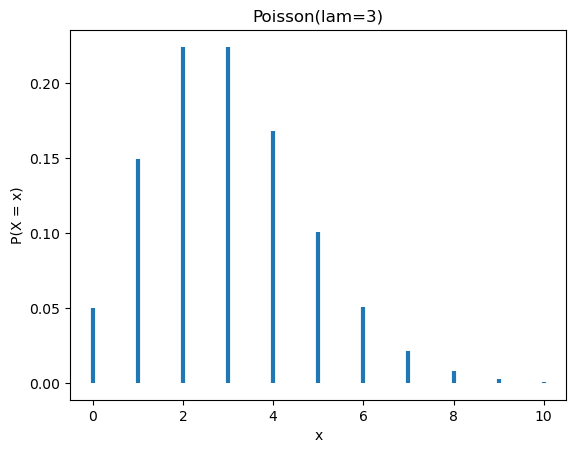

In [38]:
poisson.plot()

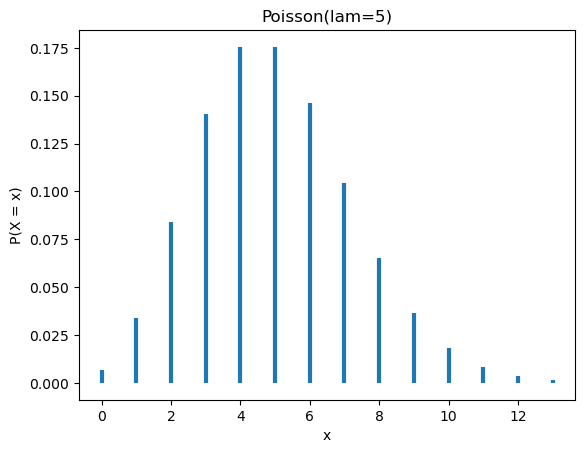

In [39]:
Poisson(5).plot()

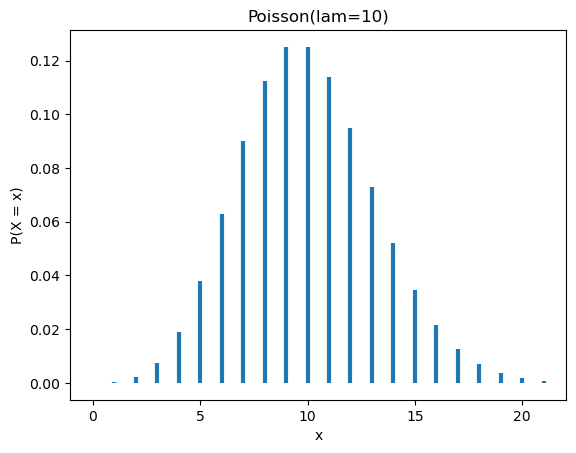

In [40]:
Poisson(10).plot()

In [42]:
class Distribucion:
    def muestra(self):
        print("¡Error! Método aún no implementado.")

    def plot(self):
        print("¡Error! Método aún no implementado.")

    def muestras(self, n=1):
        return [self.muestra() for _ in range(n)]


class Discreta:
    def pmf(self, x):
        print("¡Error! Método aún no implementado.")

    def _plot(self, xs):
        ys = [self.pmf(x) for x in xs]
        plt.vlines(xs, ymin=0, ymax=ys, lw=3)
        plt.xlabel("x")
        plt.ylabel("P(X = x)")
        plt.show()

class Continua:
    def pdf(self, x):
        print("¡Error! Método aún no implementado.")

    def _plot(self, xs):
        # Crear gráfico
        ys = [self.pdf(x) for x in xs]
        plt.plot(xs, ys)
        plt.xlabel("x")
        plt.ylabel("p(x)")
        plt.show()

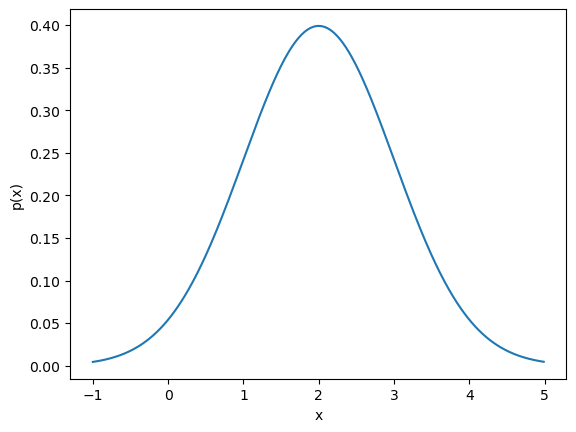

In [43]:
class Normal(Distribucion, Continua):
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

    def pdf(self, x):
        a = 1 / (self.sigma * (2 * math.pi) ** 0.5)
        b = math.exp( - 0.5 * ((x - self.mu) ** 2 / self.sigma ** 2))
        return a * b

    def muestra(self):
        return random.normalvariate(mu=self.mu, sigma=self.sigma)

    def plot(self):
        x_inicio = self.mu - self.sigma * 3
        x_fin = self.mu + self.sigma * 3
        x_paso = (x_fin - x_inicio) / 500
        xs = [x_inicio + x_paso * i for i in range(500)]
        self._plot(xs)

Normal(2, 1).plot()

In [44]:
class Poisson(Distribucion, Discreta):
    def __init__(self, lam):
        self.lam = lam

    def pmf(self, x):
        return (math.exp(-self.lam) * self.lam ** x) / math.factorial(x)

    def muestra(self):
        S, N = 0, 0
        while S < 1:
            u = random.uniform(0, 1)
            N += 1
            S += - math.log(u) / self.lam
        return N - 1

    def plot(self):
        xs = []
        x, cdf = 0, 0
        while cdf < 0.999:
            xs.append(x)
            cdf += self.pmf(x)
            x += 1

        self._plot(xs)

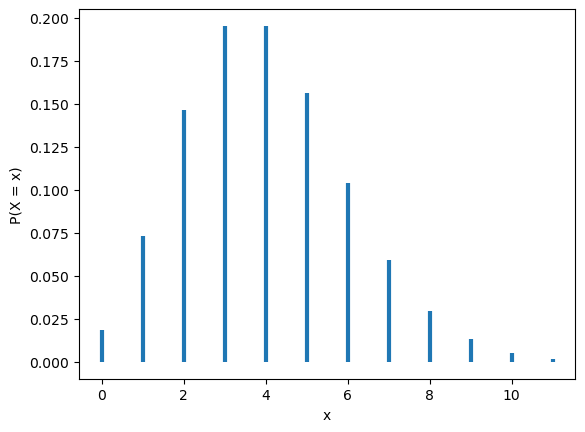

In [45]:
Poisson(4).plot()

::: {.callout-warning}

Algo de herencia múltiple y conflictos de métodos... mostrar un ejemplo y mencionar brevemente el MRO.

:::